# Data cleaning, exploration and visualization
### Federal government employees from the brazilian executive power

This dataset was acquired via API calls to the "Portal da Transparencia API" (https://api.portaldatransparencia.gov.br/swagger-ui.html),  
an API provided by the federal government to provide access to public data about the government spending.  
The script used can be found ...

The goal of this work is to practice Data Cleaning, and if the dataset allows me,  
some data visualization and analysis of the distribution of the employees.

The information presented here is for **educational purposes**.

In [1]:
# Importing pandas and numpy
import pandas as pd
import numpy as np

In [2]:
# Data loading;
# I had to use the dtype argument in this case as pandas was converting all the codes to integers, which is not what I wanted.

df = pd.read_csv("./parsed_employees.csv",dtype={'servidor_id':str, 'servidor_idAposentadoPensionista':str, 'servidor_pessoa_id':str,
       'servidor_orgaoLotacao_codigo':str,
       'servidor_orgaoExercicio_codigo':str})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1078335 entries, 0 to 1078334
Data columns (total 20 columns):
 #   Column                                      Non-Null Count    Dtype 
---  ------                                      --------------    ----- 
 0   servidor_id                                 1078335 non-null  object
 1   servidor_idAposentadoPensionista            1078335 non-null  object
 2   servidor_pessoa_id                          1078335 non-null  object
 3   nome                                        1078335 non-null  object
 4   servidor_pessoa_tipo                        1078335 non-null  object
 5   servidor_orgaoLotacao_codigo                1078335 non-null  object
 6   servidor_orgaoExercicio_codigo              1078335 non-null  object
 7   servidor_estadoExercicio                    1078335 non-null  object
 8   servidor_tipoServidor                       1078335 non-null  object
 9   servidor_flagAfastado                       1078335 non-null  int64 

In [3]:
df.head()

,servidor_id,servidor_idAposentadoPensionista,servidor_pessoa_id,nome,servidor_pessoa_tipo,servidor_orgaoLotacao_codigo,servidor_orgaoExercicio_codigo,servidor_estadoExercicio,servidor_tipoServidor,servidor_flagAfastado,cargo_uorgLotacao,cargo_dataIngressoOrgao,cargo_cargo,cargo_dataIngressoCargo,cargo_dataIngressoServicoPublico,funcao,funcao_atividade,funcao_dataIngressoOrgao,demaisSituacoes,demaisSituacoes_dataIngressoServicoPublico
0,139151002,78719753,8416947,AMANDA LINS BRITO FANECO AMORIM,Pessoa Física,40106,00101,Sem informação,Civil,1,PROCURADORIA-GERAL DA UNIAO,24/11/2016,ADVOGADO DA UNIAO,23/01/2017,05/12/2016,NaN,NaN,NaN,NaN,NaN
1,140052807,80123979,7001066,MARCOS ANTONIO CAVALCANTE,Pessoa Física,40106,00101,Sem informação,Civil,1,SUPERIOR TRIBUNAL DE JUSTICA,22/03/2001,ADVOGADO DA UNIAO,01/03/2002,22/03/2001,NaN,NaN,NaN,NaN,NaN
2,140647239,-80627134,-11,Sigiloso,Sem Informação,20115,00101,Sem informação,Sigiloso,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,140949850,84125768,4718322,JADER BORGES GUIMARAES,Pessoa Física,54000,00101,Sem informação,Civil,1,COORDENACAO-GERAL DE GESTAO DE PESSOAS,19/05/2010,AGENTE ADMINISTRATIVO,17/06/2010,17/06/2010,NaN,NaN,NaN,NaN,NaN
4,141250377,84922813,7503815,LUIS DE FREITAS JUNIOR,Pessoa Física,40106,00101,Sem informação,Civil,1,SUPERIOR TRIBUNAL DE JUSTICA,15/12/2004,PROCURADOR FEDERAL,17/12/2004,17/12/2004,NaN,NaN,NaN,NaN,NaN


In [4]:
#Let's check the first rows.
df.head()

,servidor_id,servidor_idAposentadoPensionista,servidor_pessoa_id,nome,servidor_pessoa_tipo,servidor_orgaoLotacao_codigo,servidor_orgaoExercicio_codigo,servidor_estadoExercicio,servidor_tipoServidor,servidor_flagAfastado,cargo_uorgLotacao,cargo_dataIngressoOrgao,cargo_cargo,cargo_dataIngressoCargo,cargo_dataIngressoServicoPublico,funcao,funcao_atividade,funcao_dataIngressoOrgao,demaisSituacoes,demaisSituacoes_dataIngressoServicoPublico
0,139151002,78719753,8416947,AMANDA LINS BRITO FANECO AMORIM,Pessoa Física,40106,00101,Sem informação,Civil,1,PROCURADORIA-GERAL DA UNIAO,24/11/2016,ADVOGADO DA UNIAO,23/01/2017,05/12/2016,NaN,NaN,NaN,NaN,NaN
1,140052807,80123979,7001066,MARCOS ANTONIO CAVALCANTE,Pessoa Física,40106,00101,Sem informação,Civil,1,SUPERIOR TRIBUNAL DE JUSTICA,22/03/2001,ADVOGADO DA UNIAO,01/03/2002,22/03/2001,NaN,NaN,NaN,NaN,NaN
2,140647239,-80627134,-11,Sigiloso,Sem Informação,20115,00101,Sem informação,Sigiloso,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,140949850,84125768,4718322,JADER BORGES GUIMARAES,Pessoa Física,54000,00101,Sem informação,Civil,1,COORDENACAO-GERAL DE GESTAO DE PESSOAS,19/05/2010,AGENTE ADMINISTRATIVO,17/06/2010,17/06/2010,NaN,NaN,NaN,NaN,NaN
4,141250377,84922813,7503815,LUIS DE FREITAS JUNIOR,Pessoa Física,40106,00101,Sem informação,Civil,1,SUPERIOR TRIBUNAL DE JUSTICA,15/12/2004,PROCURADOR FEDERAL,17/12/2004,17/12/2004,NaN,NaN,NaN,NaN,NaN


 - I can see in the first five rows that we have a row marked as "Sigiloso" (probably sensible information) and  
all rows here have the "estadoExercicio" column with missing information. I'll set aside the rows marked as "Sigiloso",  
and see how many "estadoExercicio" rows are missing information.

In [5]:
df_sigiloso = df[df['servidor_pessoa_id'] == '-11']
df = df[df['servidor_pessoa_id'] != '-11']

In [6]:
# 3% of the dataset is hidden, it seems I still have access to most of the information.
len(df_sigiloso)/(len(df)+len(df_sigiloso))

0.030340293137104887

In [7]:
(df['servidor_estadoExercicio'] == 'Sem informação').sum(), (df['servidor_estadoExercicio'] == 'Sem informação').sum()/len(df)
#Most of our data is missing estadoExercicio! I was hoping to at least be able to see how the federal employees are spread across the country.

(632179, 0.6045984288717294)

 - While I was taking a look at the dataset earlier I saw some duplicates. Let me see if I can find them.

In [8]:
df['servidor_pessoa_id'].duplicated().sum()

101377

In [9]:
#There are a lot servidor_pessoa_id duplicates, let's take a look at them.
df[df['servidor_pessoa_id'].duplicated(keep=False)].head(10)

,servidor_id,servidor_idAposentadoPensionista,servidor_pessoa_id,nome,servidor_pessoa_tipo,servidor_orgaoLotacao_codigo,servidor_orgaoExercicio_codigo,servidor_estadoExercicio,servidor_tipoServidor,servidor_flagAfastado,cargo_uorgLotacao,cargo_dataIngressoOrgao,cargo_cargo,cargo_dataIngressoCargo,cargo_dataIngressoServicoPublico,funcao,funcao_atividade,funcao_dataIngressoOrgao,demaisSituacoes,demaisSituacoes_dataIngressoServicoPublico
290,129551654,82622889,7514611,MIGUEL DIAZ RODRIGUES,Pessoa Física,26247,13000,RIO GRANDE DO SUL,Civil,1,DEPARTAMENTO DE ZOOTECNIA,01/11/1992,AUXILIAR DE AGROPECUARIA,31/05/2001,13/03/1990,NaN,NaN,NaN,EXERCICIO PROVISORIO,13/03/1990
291,129551655,82622889,7514611,MIGUEL DIAZ RODRIGUES,Pessoa Física,26247,13000,Sem informação,Civil,0,DEPARTAMENTO DE ZOOTECNIA,01/11/1992,AUXILIAR DE AGROPECUARIA,31/05/2001,13/03/1990,NaN,NaN,NaN,EXERCICIO PROVISORIO,13/03/1990
292,129551717,76106279,3809630,VIRGINIA MENDES CIPRIANO LIRA,Pessoa Física,13000,13000,Sem informação,Civil,0,SECRETARIA MOB SOC PROD RURAL COOPERATIV,24/05/2007,AUDITOR FISCAL FEDERAL AGROPECUARIO,01/08/2016,05/06/2007,FPE 101.3 - FUNCAO COMISSIONADA DO PODER EXECU...,COORDENADOR,24/05/2007,NaN,NaN
293,129551718,76106279,3809630,VIRGINIA MENDES CIPRIANO LIRA,Pessoa Física,13000,13000,Sem informação,Civil,0,SECRETARIA MOB SOC PROD RURAL COOPERATIV,24/05/2007,AUDITOR FISCAL FEDERAL AGROPECUARIO,01/08/2016,05/06/2007,FPE 101.3 - FUNCAO COMISSIONADA DO PODER EXECU...,COORDENADOR,24/05/2007,NaN,NaN
294,129551794,82909864,3205196,REGINA KAZUKO KAWATA DA SILVEIRA,Pessoa Física,13000,13000,Sem informação,Civil,0,SUP FED AGRIC PEC ABAST EST SAO PAULO-SP,22/08/2018,ANALISTA TECNICO ADMINISTRATIVO,12/09/2013,12/09/2013,DAS 101.1 - DIRECAO E ASSESSORAMENTO SUPERIOR,CHEFE DE SERVICO,22/08/2018,NaN,NaN
295,129551795,82909864,3205196,REGINA KAZUKO KAWATA DA SILVEIRA,Pessoa Física,13000,13000,Sem informação,Civil,0,SUP FED AGRIC PEC ABAST EST SAO PAULO-SP,22/08/2018,ANALISTA TECNICO ADMINISTRATIVO,12/09/2013,12/09/2013,DAS 101.1 - DIRECAO E ASSESSORAMENTO SUPERIOR,CHEFE DE SERVICO,22/08/2018,NaN,NaN
309,129647700,76423336,3807910,CAMILLA ROSE THOMAZ DE SA ALMEIDA,Pessoa Física,40106,13000,Sem informação,Civil,0,CONJUR DO MAPA,07/07/2010,ADVOGADO DA UNIAO,02/08/2010,08/07/2010,FPE 101.3 - FUNCAO COMISSIONADA DO PODER EXECU...,COORDENADOR,20/03/2020,NaN,NaN
310,129647701,76423336,3807910,CAMILLA ROSE THOMAZ DE SA ALMEIDA,Pessoa Física,40106,13000,Sem informação,Civil,0,CONJUR DO MAPA,07/07/2010,ADVOGADO DA UNIAO,02/08/2010,08/07/2010,FPE 101.3 - FUNCAO COMISSIONADA DO PODER EXECU...,COORDENADOR,20/03/2020,NaN,NaN
314,129649679,72414373,713311,DANIELA CAMPOS PAIVA COSTA,Pessoa Física,13000,13000,Sem informação,Civil,0,SERV APOIO OPERACIONAL,25/06/2010,AGENTE ADMINISTRATIVO,05/07/2010,05/07/2010,FPE 101.3 - FUNCAO COMISSIONADA DO PODER EXECU...,COORDENADOR,25/06/2010,NaN,NaN
315,129649680,72414373,713311,DANIELA CAMPOS PAIVA COSTA,Pessoa Física,13000,13000,Sem informação,Civil,0,SERV APOIO OPERACIONAL,25/06/2010,AGENTE ADMINISTRATIVO,05/07/2010,05/07/2010,FPE 101.3 - FUNCAO COMISSIONADA DO PODER EXECU...,COORDENADOR,25/06/2010,NaN,NaN


- For some duplicates, one of the rows has "estadoExercicio" and a different value in the "flagAfastado" column, as shown in index 290/291

In [10]:
df.loc[[290,291]]

,servidor_id,servidor_idAposentadoPensionista,servidor_pessoa_id,nome,servidor_pessoa_tipo,servidor_orgaoLotacao_codigo,servidor_orgaoExercicio_codigo,servidor_estadoExercicio,servidor_tipoServidor,servidor_flagAfastado,cargo_uorgLotacao,cargo_dataIngressoOrgao,cargo_cargo,cargo_dataIngressoCargo,cargo_dataIngressoServicoPublico,funcao,funcao_atividade,funcao_dataIngressoOrgao,demaisSituacoes,demaisSituacoes_dataIngressoServicoPublico
290,129551654,82622889,7514611,MIGUEL DIAZ RODRIGUES,Pessoa Física,26247,13000,RIO GRANDE DO SUL,Civil,1,DEPARTAMENTO DE ZOOTECNIA,01/11/1992,AUXILIAR DE AGROPECUARIA,31/05/2001,13/03/1990,NaN,NaN,NaN,EXERCICIO PROVISORIO,13/03/1990
291,129551655,82622889,7514611,MIGUEL DIAZ RODRIGUES,Pessoa Física,26247,13000,Sem informação,Civil,0,DEPARTAMENTO DE ZOOTECNIA,01/11/1992,AUXILIAR DE AGROPECUARIA,31/05/2001,13/03/1990,NaN,NaN,NaN,EXERCICIO PROVISORIO,13/03/1990


In [11]:
#How balanced are the values of flagAfastado on the duplicates?
df_duplicates = df[df['servidor_pessoa_id'].duplicated(keep=False)]
df = df.drop(df_duplicates.index)
df_duplicates['servidor_flagAfastado'].value_counts()

0    188740
1     13548
Name: servidor_flagAfastado, dtype: int64

In [12]:
len(df)+len(df_duplicates)

1045618

In [13]:
#And how are the value counts for estadoExercicio?
df_duplicates['servidor_estadoExercicio'].value_counts(), print((df_duplicates['servidor_estadoExercicio'] == 'Sem informação').sum()/len(df_duplicates))
#92% of the duplicates have no information on estadoExercicio, more than the 60% of the total dataset

0.9203116348967808


(Sem informação         186168
 DISTRITO FEDERAL         4141
 RIO DE JANEIRO           3783
 MINAS GERAIS             1230
 RIO GRANDE DO SUL         883
 SÃO PAULO                 786
 PERNAMBUCO                523
 PARANÁ                    462
 BAHIA                     424
 PARAÍBA                   416
 SANTA CATARINA            401
 CEARÁ                     375
 RIO GRANDE DO NORTE       327
 ESPÍRITO SANTO            266
 MARANHÃO                  266
 MATO GROSSO DO SUL        245
 PARÁ                      239
 GOIÁS                     231
 RONDÔNIA                  195
 SERGIPE                   178
 PIAUÍ                     165
 ALAGOAS                   163
 AMAZONAS                  122
 MATO GROSSO                85
 TOCANTINS                  76
 RORAIMA                    62
 AMAPÁ                      52
 ACRE                       24
 Name: servidor_estadoExercicio, dtype: int64,
 None)

In [14]:
# I can also see how many duplicates each value has
df_duplicates['servidor_pessoa_id'].value_counts()
#Some employees have up to 4 entries of them!

1014281    4
8902411    4
2212412    4
1412828    4
8908682    4
          ..
4900818    2
8404454    2
2509249    2
8711198    2
5909878    2
Name: servidor_pessoa_id, Length: 100911, dtype: int64

In [15]:
#Let's check some of those
df_duplicates[(df_duplicates['servidor_pessoa_id'] == '8902411') | (df_duplicates['servidor_pessoa_id'] == '1014281') | (df_duplicates['servidor_pessoa_id'] == '2212412')].sort_values(by=['servidor_pessoa_id','servidor_id'])

,servidor_id,servidor_idAposentadoPensionista,servidor_pessoa_id,nome,servidor_pessoa_tipo,servidor_orgaoLotacao_codigo,servidor_orgaoExercicio_codigo,servidor_estadoExercicio,servidor_tipoServidor,servidor_flagAfastado,cargo_uorgLotacao,cargo_dataIngressoOrgao,cargo_cargo,cargo_dataIngressoCargo,cargo_dataIngressoServicoPublico,funcao,funcao_atividade,funcao_dataIngressoOrgao,demaisSituacoes,demaisSituacoes_dataIngressoServicoPublico
250577,153150288,77917577,1014281,MAURO IUNES OKAMOTO,Pessoa Física,17000,17000,Sem informação,Civil,0,SECRETARIA DO TESOURO NACIONAL,30/12/1994,AUDITOR FEDERAL DE FINANCAS E CONTROLE,01/08/2016,30/12/1994,FPE 101.2 - FUNCAO COMISSIONADA DO PODER EXECU...,GERENTE,30/12/1994,SEM VINCULO,Inválido
375335,153150289,77917577,1014281,MAURO IUNES OKAMOTO,Pessoa Física,24209,24209,Sem informação,Civil,0,SECRETARIA DO TESOURO NACIONAL,30/12/1994,AUDITOR FEDERAL DE FINANCAS E CONTROLE,01/08/2016,30/12/1994,FPE 101.2 - FUNCAO COMISSIONADA DO PODER EXECU...,GERENTE,30/12/1994,SEM VINCULO,Inválido
286148,153150290,77917577,1014281,MAURO IUNES OKAMOTO,Pessoa Física,20302,20302,Sem informação,Civil,0,SECRETARIA DO TESOURO NACIONAL,30/12/1994,AUDITOR FEDERAL DE FINANCAS E CONTROLE,01/08/2016,30/12/1994,FPE 101.2 - FUNCAO COMISSIONADA DO PODER EXECU...,GERENTE,30/12/1994,SEM VINCULO,Inválido
250578,153150291,77917577,1014281,MAURO IUNES OKAMOTO,Pessoa Física,17000,17000,Sem informação,Civil,0,SECRETARIA DO TESOURO NACIONAL,30/12/1994,AUDITOR FEDERAL DE FINANCAS E CONTROLE,01/08/2016,30/12/1994,FPE 101.2 - FUNCAO COMISSIONADA DO PODER EXECU...,GERENTE,30/12/1994,SEM VINCULO,Inválido
1048880,131353867,84826391,2212412,DJACI VIEIRA DE SOUSA,Pessoa Física,99013,99013,Sem informação,Civil,0,CEDIDOS E AFASTADOS DA SGC,02/01/2019,AGENTE ADMINISTRATIVO,01/07/2006,12/01/1995,DAS 101.5 - DIRECAO E ASSESSORAMENTO SUPERIOR,CHEFE DE GABINETE,03/05/2019,SEM VINCULO,Inválido
758762,131353868,84826391,2212412,DJACI VIEIRA DE SOUSA,Pessoa Física,26443,26443,Sem informação,Civil,0,CEDIDOS E AFASTADOS DA SGC,02/01/2019,AGENTE ADMINISTRATIVO,01/07/2006,12/01/1995,DAS 101.5 - DIRECAO E ASSESSORAMENTO SUPERIOR,CHEFE DE GABINETE,03/05/2019,SEM VINCULO,Inválido
10172,131353869,84826391,2212412,DJACI VIEIRA DE SOUSA,Pessoa Física,17000,15000,Sem informação,Civil,0,CEDIDOS E AFASTADOS DA SGC,02/01/2019,AGENTE ADMINISTRATIVO,01/07/2006,12/01/1995,DAS 101.5 - DIRECAO E ASSESSORAMENTO SUPERIOR,CHEFE DE GABINETE,03/05/2019,SEM VINCULO,Inválido
10173,131353870,84826391,2212412,DJACI VIEIRA DE SOUSA,Pessoa Física,17000,15000,Sem informação,Civil,1,CEDIDOS E AFASTADOS DA SGC,02/01/2019,AGENTE ADMINISTRATIVO,01/07/2006,12/01/1995,DAS 101.5 - DIRECAO E ASSESSORAMENTO SUPERIOR,CHEFE DE GABINETE,03/05/2019,SEM VINCULO,Inválido
10457,136650006,79517596,8902411,VICTOR GODOY VEIGA,Pessoa Física,59000,15000,DISTRITO FEDERAL,Civil,0,Sem Informação,21/07/2020,MINISTRO DE ESTADO,30/03/2022,02/07/2004,NaN,NaN,NaN,SEM VINCULO,Inválido
10458,136650007,79517596,8902411,VICTOR GODOY VEIGA,Pessoa Física,59000,15000,Sem informação,Civil,1,Sem Informação,21/07/2020,MINISTRO DE ESTADO,30/03/2022,02/07/2004,NaN,NaN,NaN,SEM VINCULO,Inválido


In [16]:
#Do all the people that have duplicated entries have funcao or demais_situacoes?

df_duplicates[df_duplicates['funcao'].isnull() & df_duplicates['demaisSituacoes'].isnull()]
#The answer is no.

,servidor_id,servidor_idAposentadoPensionista,servidor_pessoa_id,nome,servidor_pessoa_tipo,servidor_orgaoLotacao_codigo,servidor_orgaoExercicio_codigo,servidor_estadoExercicio,servidor_tipoServidor,servidor_flagAfastado,cargo_uorgLotacao,cargo_dataIngressoOrgao,cargo_cargo,cargo_dataIngressoCargo,cargo_dataIngressoServicoPublico,funcao,funcao_atividade,funcao_dataIngressoOrgao,demaisSituacoes,demaisSituacoes_dataIngressoServicoPublico
1870,134249603,85407404,4003995,DIEGO GOMES ROCHA,Pessoa Física,13000,13000,MINAS GERAIS,Civil,0,DEPTO DE QUIMICA - NS,31/03/2022,PROF ENS BAS TEC TECNOLOGICO-SUBSTITUTO,17/03/2022,17/03/2022,NaN,NaN,NaN,NaN,NaN
2340,135551593,82725644,3913804,MARIA DE NAZARE CONCEICAO E SILVA PINHEIRO,Pessoa Física,13000,13000,PARÁ,Civil,0,SUP FED AGRIC PEC ABAST EST PARA-SFA-PA,01/08/1996,MEDICO,01/07/2006,04/01/1982,NaN,NaN,NaN,NaN,NaN
2341,135551594,82725644,3913804,MARIA DE NAZARE CONCEICAO E SILVA PINHEIRO,Pessoa Física,13000,13000,PARÁ,Civil,0,SUP FED AGRIC PEC ABAST EST PARA-SFA-PA,01/08/1996,MEDICO,01/07/2006,04/01/1982,NaN,NaN,NaN,NaN,NaN
3347,138446739,83713843,3212709,ALINE GOZZI,Pessoa Física,13000,13000,MINAS GERAIS,Civil,1,SUP FED AGRIC PEC ABAST EST M GERAIS,02/10/2014,TECNICO DE LABORATORIO,12/11/2014,12/11/2014,NaN,NaN,NaN,NaN,NaN
6025,146250185,84611538,2407257,ARILSON LEHMKUHL,Pessoa Física,13000,13000,DISTRITO FEDERAL,Civil,0,DIRETORIA-GERAL DO CAMPUS SAO SEBASTIAO,06/06/2012,PROFESSOR ENS BASICO TECN TECNOLOGICO,01/03/2013,03/07/2012,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1077646,157449806,72111448,5909878,ROBERTO HIROMITI AKIYAMA,Pessoa Física,25000,99991,Sem informação,Civil,1,SUS-SMS/PAM - PARACAMBI,26/11/1975,MEDICO,01/08/2009,26/11/1975,NaN,NaN,NaN,NaN,NaN
1077647,157449807,72111448,5909878,ROBERTO HIROMITI AKIYAMA,Pessoa Física,25000,99991,Sem informação,Civil,1,SUS-SMS/PAM - PARACAMBI,26/11/1975,MEDICO,01/08/2009,26/11/1975,NaN,NaN,NaN,NaN,NaN
1077850,157652999,77524127,601217,JAIRO GONCALVES DIAS,Pessoa Física,25000,99991,Sem informação,Civil,1,SERV DE APOIO DIAGNOSTICO E TERAPEUTICO,29/12/1995,TECNICO DE NIVEL MEDIO,01/03/2006,26/08/1985,NaN,NaN,NaN,NaN,NaN
1078055,157952110,84615772,5309934,ANA LUIZA FURTADO ARAGAO,Pessoa Física,25000,99991,Sem informação,Civil,1,SUS/FEDERAL - SE,09/11/2011,MEDICO,14/12/2011,14/12/2011,NaN,NaN,NaN,NaN,NaN


### For the duplicates:
For each row with the same "servidor_pessoa_id", I'll keep the entry that I think is the last one (with the highest "servidor_id").  
I'll try to use any estadoExercicio information to fill in the "Sem informação" values.

In [17]:
def helperfunc(group):
    #Finds a dataframe with values different than "Sem informação"
    estados = group[~group.isin(["Sem informação"])]
    #if it finds any, returns it's first position, otherwise returns NaN
    if len(estados):
        return estados.iloc[0]
    else:
        return np.nan

In [18]:
# I usually go for a groupby.transform, but in this case it was taking very long.
# A groupby.apply did the trick.
grouped_estado = df_duplicates.groupby("servidor_pessoa_id")["servidor_estadoExercicio"].apply(helperfunc)

In [19]:
newdf = pd.merge(df_duplicates.drop('servidor_estadoExercicio',axis=1),grouped_estado.reset_index(),how='left')
newdf[(newdf['servidor_pessoa_id'] == '8902411') | (newdf['servidor_pessoa_id'] == '1014281') | (newdf['servidor_pessoa_id'] == '2212412')].sort_values(by=['servidor_pessoa_id','servidor_id'])

,servidor_id,servidor_idAposentadoPensionista,servidor_pessoa_id,nome,servidor_pessoa_tipo,servidor_orgaoLotacao_codigo,servidor_orgaoExercicio_codigo,servidor_tipoServidor,servidor_flagAfastado,cargo_uorgLotacao,cargo_dataIngressoOrgao,cargo_cargo,cargo_dataIngressoCargo,cargo_dataIngressoServicoPublico,funcao,funcao_atividade,funcao_dataIngressoOrgao,demaisSituacoes,demaisSituacoes_dataIngressoServicoPublico,servidor_estadoExercicio
22077,153150288,77917577,1014281,MAURO IUNES OKAMOTO,Pessoa Física,17000,17000,Civil,0,SECRETARIA DO TESOURO NACIONAL,30/12/1994,AUDITOR FEDERAL DE FINANCAS E CONTROLE,01/08/2016,30/12/1994,FPE 101.2 - FUNCAO COMISSIONADA DO PODER EXECU...,GERENTE,30/12/1994,SEM VINCULO,Inválido,NaN
36976,153150289,77917577,1014281,MAURO IUNES OKAMOTO,Pessoa Física,24209,24209,Civil,0,SECRETARIA DO TESOURO NACIONAL,30/12/1994,AUDITOR FEDERAL DE FINANCAS E CONTROLE,01/08/2016,30/12/1994,FPE 101.2 - FUNCAO COMISSIONADA DO PODER EXECU...,GERENTE,30/12/1994,SEM VINCULO,Inválido,NaN
30480,153150290,77917577,1014281,MAURO IUNES OKAMOTO,Pessoa Física,20302,20302,Civil,0,SECRETARIA DO TESOURO NACIONAL,30/12/1994,AUDITOR FEDERAL DE FINANCAS E CONTROLE,01/08/2016,30/12/1994,FPE 101.2 - FUNCAO COMISSIONADA DO PODER EXECU...,GERENTE,30/12/1994,SEM VINCULO,Inválido,NaN
22078,153150291,77917577,1014281,MAURO IUNES OKAMOTO,Pessoa Física,17000,17000,Civil,0,SECRETARIA DO TESOURO NACIONAL,30/12/1994,AUDITOR FEDERAL DE FINANCAS E CONTROLE,01/08/2016,30/12/1994,FPE 101.2 - FUNCAO COMISSIONADA DO PODER EXECU...,GERENTE,30/12/1994,SEM VINCULO,Inválido,NaN
201962,131353867,84826391,2212412,DJACI VIEIRA DE SOUSA,Pessoa Física,99013,99013,Civil,0,CEDIDOS E AFASTADOS DA SGC,02/01/2019,AGENTE ADMINISTRATIVO,01/07/2006,12/01/1995,DAS 101.5 - DIRECAO E ASSESSORAMENTO SUPERIOR,CHEFE DE GABINETE,03/05/2019,SEM VINCULO,Inválido,NaN
137867,131353868,84826391,2212412,DJACI VIEIRA DE SOUSA,Pessoa Física,26443,26443,Civil,0,CEDIDOS E AFASTADOS DA SGC,02/01/2019,AGENTE ADMINISTRATIVO,01/07/2006,12/01/1995,DAS 101.5 - DIRECAO E ASSESSORAMENTO SUPERIOR,CHEFE DE GABINETE,03/05/2019,SEM VINCULO,Inválido,NaN
3834,131353869,84826391,2212412,DJACI VIEIRA DE SOUSA,Pessoa Física,17000,15000,Civil,0,CEDIDOS E AFASTADOS DA SGC,02/01/2019,AGENTE ADMINISTRATIVO,01/07/2006,12/01/1995,DAS 101.5 - DIRECAO E ASSESSORAMENTO SUPERIOR,CHEFE DE GABINETE,03/05/2019,SEM VINCULO,Inválido,NaN
3835,131353870,84826391,2212412,DJACI VIEIRA DE SOUSA,Pessoa Física,17000,15000,Civil,1,CEDIDOS E AFASTADOS DA SGC,02/01/2019,AGENTE ADMINISTRATIVO,01/07/2006,12/01/1995,DAS 101.5 - DIRECAO E ASSESSORAMENTO SUPERIOR,CHEFE DE GABINETE,03/05/2019,SEM VINCULO,Inválido,NaN
4044,136650006,79517596,8902411,VICTOR GODOY VEIGA,Pessoa Física,59000,15000,Civil,0,Sem Informação,21/07/2020,MINISTRO DE ESTADO,30/03/2022,02/07/2004,NaN,NaN,NaN,SEM VINCULO,Inválido,DISTRITO FEDERAL
4045,136650007,79517596,8902411,VICTOR GODOY VEIGA,Pessoa Física,59000,15000,Civil,1,Sem Informação,21/07/2020,MINISTRO DE ESTADO,30/03/2022,02/07/2004,NaN,NaN,NaN,SEM VINCULO,Inválido,DISTRITO FEDERAL


In [20]:
len(newdf)

202288

In [21]:
newdf = newdf.sort_values(by='servidor_id',ascending=False).drop_duplicates('servidor_pessoa_id')

In [22]:
df_uniques = pd.concat([df,newdf])

- Now I have a DataFrame with only one entry per employee.

In [23]:
df_uniques['servidor_estadoExercicio'] = df_uniques['servidor_estadoExercicio'].replace({'Sem informação':np.nan})

In [24]:
df_uniques.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 944241 entries, 0 to 8006
Data columns (total 20 columns):
 #   Column                                      Non-Null Count   Dtype 
---  ------                                      --------------   ----- 
 0   servidor_id                                 944241 non-null  object
 1   servidor_idAposentadoPensionista            944241 non-null  object
 2   servidor_pessoa_id                          944241 non-null  object
 3   nome                                        944241 non-null  object
 4   servidor_pessoa_tipo                        944241 non-null  object
 5   servidor_orgaoLotacao_codigo                944241 non-null  object
 6   servidor_orgaoExercicio_codigo              944241 non-null  object
 7   servidor_estadoExercicio                    411199 non-null  object
 8   servidor_tipoServidor                       944241 non-null  object
 9   servidor_flagAfastado                       944241 non-null  int64 
 10  cargo_uorg

### Now that the data has no duplicates
... I will try to extract some information from it.

In [25]:
df_uniques['servidor_pessoa_tipo'].value_counts()

Pessoa Física     944240
Sem Informação         1
Name: servidor_pessoa_tipo, dtype: int64

In [26]:
df_uniques[df_uniques['servidor_pessoa_tipo'] == "Sem Informação"]

,servidor_id,servidor_idAposentadoPensionista,servidor_pessoa_id,nome,servidor_pessoa_tipo,servidor_orgaoLotacao_codigo,servidor_orgaoExercicio_codigo,servidor_estadoExercicio,servidor_tipoServidor,servidor_flagAfastado,cargo_uorgLotacao,cargo_dataIngressoOrgao,cargo_cargo,cargo_dataIngressoCargo,cargo_dataIngressoServicoPublico,funcao,funcao_atividade,funcao_dataIngressoOrgao,demaisSituacoes,demaisSituacoes_dataIngressoServicoPublico
6977,149348817,178200191,-1,SEM INFORMACAO,Sem Informação,16000,16000,NaN,Militar,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [27]:
#Dropping this single row that has no information, and dropping the "servidor_pessoa_tipo" column, as it has the same value across all other rows.
df_uniques = df_uniques.drop(6977)

In [28]:
df_uniques = df_uniques.drop("servidor_pessoa_tipo",axis=1)

In [29]:
df_uniques.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 944240 entries, 0 to 8006
Data columns (total 19 columns):
 #   Column                                      Non-Null Count   Dtype 
---  ------                                      --------------   ----- 
 0   servidor_id                                 944240 non-null  object
 1   servidor_idAposentadoPensionista            944240 non-null  object
 2   servidor_pessoa_id                          944240 non-null  object
 3   nome                                        944240 non-null  object
 4   servidor_orgaoLotacao_codigo                944240 non-null  object
 5   servidor_orgaoExercicio_codigo              944240 non-null  object
 6   servidor_estadoExercicio                    411199 non-null  object
 7   servidor_tipoServidor                       944240 non-null  object
 8   servidor_flagAfastado                       944240 non-null  int64 
 9   cargo_uorgLotacao                           578459 non-null  object
 10  cargo_data

In [30]:
#I will create new DataFrames with the count of employees per agency, rename the columns and sort them in descending orger, by the number of employees.
#I can use this DataFrame to see which agencies have the higher number of employees.
df_lotacao = df_uniques.groupby('servidor_orgaoLotacao_codigo').count()[['servidor_id']].reset_index()
df_lotacao.columns = ['codigo','contagem']
df_lotacao = df_lotacao.sort_values(by='contagem',ascending=False)

df_exercicio = df_uniques.groupby('servidor_orgaoExercicio_codigo').count()[['servidor_id']].reset_index()
df_exercicio.columns = ['codigo','contagem']
df_exercicio = df_exercicio.sort_values(by='contagem',ascending=False)

In [31]:
df_orgaos = pd.read_csv("./orgaos_siape.csv")
df_orgaos.head()

,codigo,descricao
0,00001,IGNORADO - CONVERSAO DO SIPEFAZ
1,00005,Exc - Empresa Privada
2,00006,Exc - Empresas Públicas / CLT
3,00008,Exc - Entidades em Extinção / L.80
4,00009,Exc - Estados / Municípios / Outros


In [32]:
orgaos_dict = dict(zip(df_orgaos['codigo'],df_orgaos['descricao']))

In [33]:
df_lotacao['orgao'] = df_lotacao['codigo'].map(orgaos_dict)
df_exercicio['orgao'] = df_exercicio['codigo'].map(orgaos_dict)

## Visualization and more exploration

- My first idea was to use a seaborn.barplot to plot the bars already counted from df_lotacao and df_exercicio, however,
I wanted to have the "hue" option available.  
Therefore I will use the ordered count DataFrames only to help me plot a chart that uses the main df_uniques as source,
#and let seaborn do the counting.

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

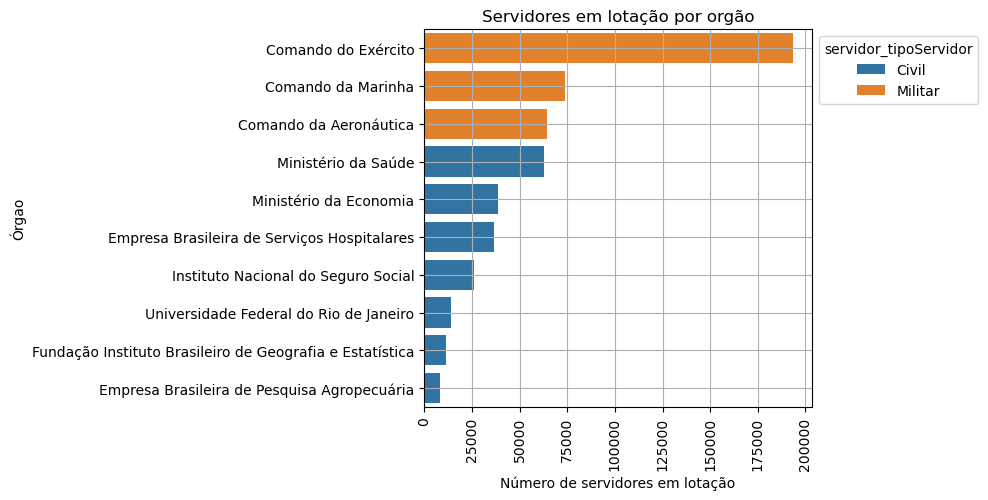

In [84]:
fig,ax = plt.subplots(dpi=100,figsize=(5,5))
sns.countplot(data=df_uniques,y='servidor_orgaoLotacao_codigo',order=df_lotacao['codigo'].head(10),hue='servidor_tipoServidor',dodge=False,ax=ax)
ax.set(yticklabels=df_lotacao['orgao'].head(10));
ax.tick_params(axis='x',rotation=90)
plt.title("Servidores em lotação por orgão")
plt.ylabel("Órgao")
plt.xlabel("Número de servidores em lotação")
plt.grid();
sns.move_legend(ax, "upper left", bbox_to_anchor=(1,1))

plt.savefig('./plots/servidores-lotação-orgão.png',bbox_inches='tight',facecolor='white')

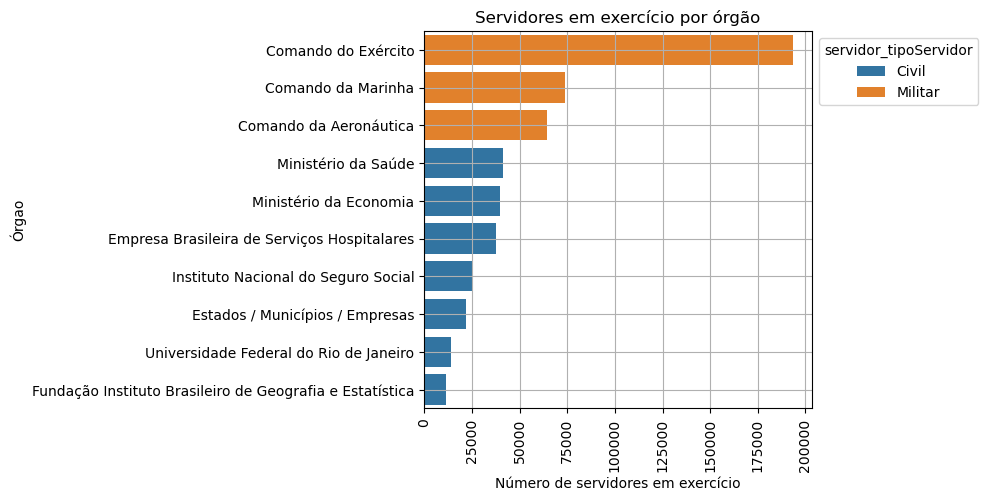

In [86]:
fig,ax = plt.subplots(dpi=100,figsize=(5,5))
sns.countplot(data=df_uniques,y='servidor_orgaoExercicio_codigo',order=df_exercicio['codigo'].head(10),hue='servidor_tipoServidor',dodge=False,ax=ax)
ax.set(yticklabels=df_exercicio['orgao'].head(10));
ax.tick_params(axis='x',rotation=90)
plt.title("Servidores em exercício por órgão")
plt.ylabel("Órgao")
plt.xlabel("Número de servidores em exercício")

plt.grid();
sns.move_legend(ax, "upper left", bbox_to_anchor=(1,1))

plt.savefig('./plots/servidores-exercicio-orgão.png',bbox_inches='tight',facecolor='white')

- It seems obvious now that all the military employees are concentrated in the 3 military agencies.  
It is also interesting how those 3 agencies hold most of all employees of the federal government.  
Maybe I should filter them out if I want to take a better look at the rest of the agencies.

In [37]:
df_exercicio['contagem'][:3].sum()

342553

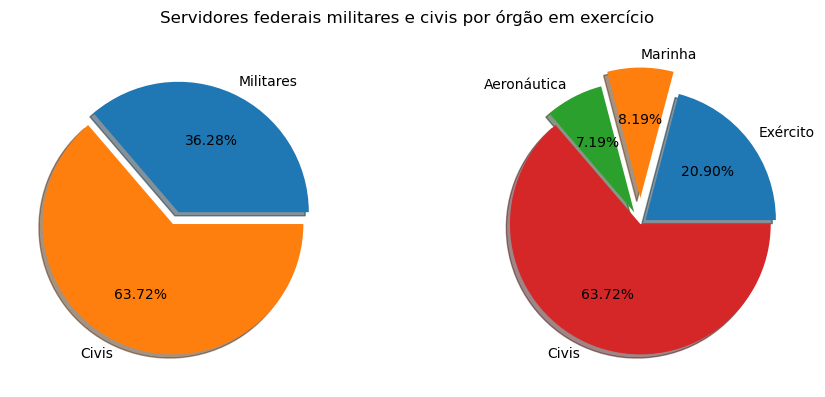

In [87]:
fig,axes = plt.subplots(dpi=100, figsize=(10,4),ncols=2)

pie_values = [df_exercicio['contagem'][:3].sum(),df_exercicio['contagem'][3:].sum()]
axes[0].pie(pie_values, labels=['Militares','Civis'],autopct='%.2f%%',explode=(0.1,0),shadow=True);

pie_values = list(df_exercicio['contagem'][:3])
pie_values.append(df_exercicio['contagem'][3:].sum())
labels = ['Exército','Marinha','Aeronáutica','Civis']
axes[1].pie(pie_values,labels=labels,autopct='%.2f%%',explode=(0.05,0.2,0.1,0),shadow=True);

fig.suptitle("Servidores federais militares e civis por órgão em exercício")

#I had to the figure background color to white here as I am using a dark theme on my notebook editor
fig.set_facecolor('white')
plt.tight_layout();
plt.savefig('./plots/divisão-servidores-exército.png',bbox_inches='tight')

In [39]:
df_exercicio.head(3)

,codigo,contagem,orgao
15,16000,197304,Comando do Exército
228,70000,77342,Comando da Marinha
29,21000,67907,Comando da Aeronáutica


In [40]:
df_lotacao.head(3)

,codigo,contagem,orgao
5,16000,198469,Comando do Exército
215,70000,77712,Comando da Marinha
18,21000,68247,Comando da Aeronáutica


#

In [41]:
df_exercicio.join(100*df_exercicio['contagem']/len(df_uniques),rsuffix='%').head()

,codigo,contagem,orgao,contagem%
15,16000,197304,Comando do Exército,20.895535
228,70000,77342,Comando da Marinha,8.190926
29,21000,67907,Comando da Aeronáutica,7.191710
40,25000,41286,Ministério da Saúde,4.372405
17,17000,39664,Ministério da Economia,4.200627


In [42]:
df_lotacao.join(100*df_lotacao['contagem']/len(df_uniques),rsuffix='%').head()

,codigo,contagem,orgao,contagem%
5,16000,198469,Comando do Exército,21.018915
215,70000,77712,Comando da Marinha,8.230111
18,21000,68247,Comando da Aeronáutica,7.227718
30,25000,62974,Ministério da Saúde,6.669279
7,17000,38681,Ministério da Economia,4.096522


- We can see that **21% of all federal government employees are Army employees**, followed by the Navy with 8% and then Aeronautics, with 7%.

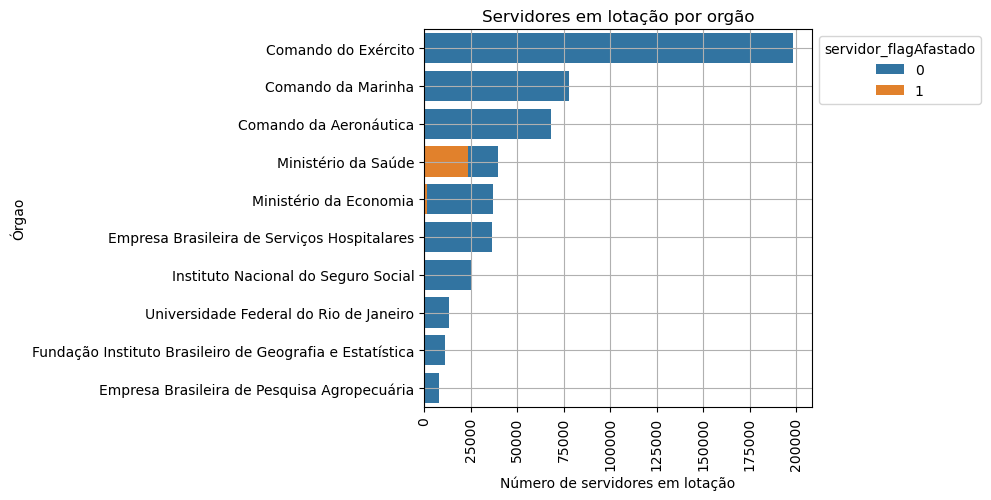

In [88]:
#Before I start to work on the data without the military, I'll use the same plot as before, but with the "on leave" flag ("flagAfastado") as hue,
#to see how many employees are flagged as being on work leave.
fig,ax = plt.subplots(dpi=100,figsize=(5,5))
sns.countplot(data=df_uniques,y='servidor_orgaoLotacao_codigo',order=df_lotacao['codigo'].head(10),hue='servidor_flagAfastado',dodge=False,ax=ax)
ax.set(yticklabels=df_lotacao['orgao'].head(10));
ax.tick_params(axis='x',rotation=90)
plt.title("Servidores em lotação por orgão")
plt.ylabel("Órgao")
plt.xlabel("Número de servidores em lotação")
plt.grid();
sns.move_legend(ax, "upper left", bbox_to_anchor=(1,1))

plt.savefig('./plots/servidores-lotação-orgão-hue-afastado.png',bbox_inches='tight',facecolor='white')

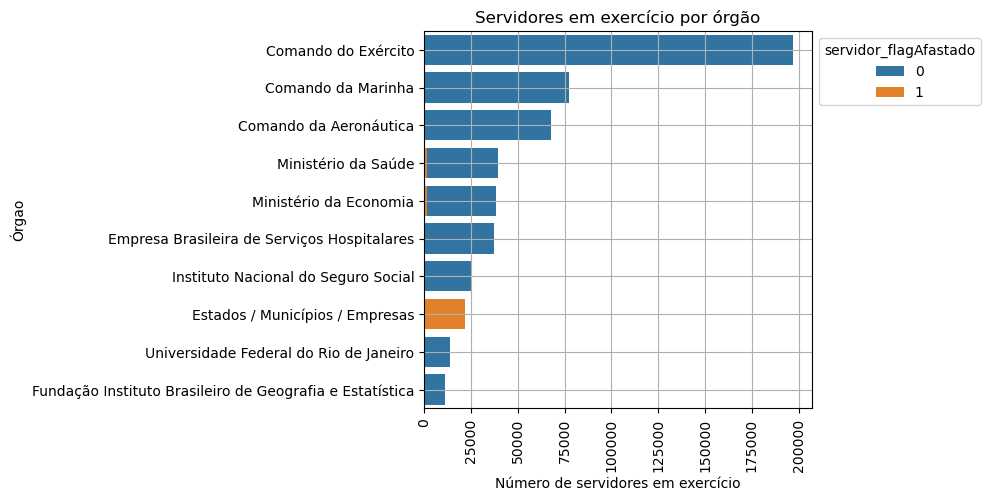

In [89]:
fig,ax = plt.subplots(dpi=100,figsize=(5,5))
sns.countplot(data=df_uniques,y='servidor_orgaoExercicio_codigo',order=df_exercicio['codigo'].head(10),hue='servidor_flagAfastado',dodge=False,ax=ax)
ax.set(yticklabels=df_exercicio['orgao'].head(10));
ax.tick_params(axis='x',rotation=90)
plt.title("Servidores em exercício por órgão")
plt.ylabel("Órgao")
plt.xlabel("Número de servidores em exercício")
plt.grid();
sns.move_legend(ax, "upper left", bbox_to_anchor=(1,1))

plt.savefig('./plots/servidores-exercício-orgão-hue-afastado.png',bbox_inches='tight',facecolor='white')

- There seems strange: employees assigned to the Ministry of Health seem to be around 60-70% flagged as on leave,  
while when we look at the agencies by the employees that are exercising their duties, the numbers change drastically.
- Almost all the employees on leave on the top 10 agencies by employees exercising duties are on the "States/Counties/Companies" category,  
and the Ministry of Health has a very small amount (as expected) of employees on leave.

In [45]:
#We can also take a look at the bottom  agencies by number of employees
df_exercicio.tail(10)

,codigo,contagem,orgao
239,93120,1,Governo do Estado do Acre
304,99062,1,Companhia das Docas do Estado da Bahia
302,99059,1,Centrais Eletricas do Norte do Brasil S.A.
301,99058,1,Companhia Docas do Estado de São Paulo
12,12002,1,Justiça Federal - Amapá
297,99050,1,Tribunal Regional do Trabalho - AL
296,99049,1,Tribunal Regional do Trabalho da 15ª Região
269,99011,1,Empresa Brasileira de Infraestrutura Aeroportu...
201,41000,1,Ministério das Comunicações
324,BC068,1,CONSELHO CONTROLE ADTIVIDADES FINANCEIRA


In [46]:
#there are many entries with only a single employee, maybe it's more useful to count those agencies by number of employees
df_exercicio.groupby('contagem').count().sort_values(by='codigo',ascending=False).head(5)

,codigo,orgao
contagem,,
1,21,21
2,21,21
4,12,12
6,10,10
9,8,8


In [47]:
df_lotacao.groupby('contagem').count().sort_values(by='codigo',ascending=False).head(5)

,codigo,orgao
contagem,,
1,15,15
2,9,9
3,8,8
5,6,6
4,5,5


- Now I will separate the military employees from the common employees.

In [48]:
df_civis = df_uniques[df_uniques['servidor_tipoServidor'] == 'Civil'].copy()
df_civis.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 612405 entries, 0 to 8006
Data columns (total 19 columns):
 #   Column                                      Non-Null Count   Dtype 
---  ------                                      --------------   ----- 
 0   servidor_id                                 612405 non-null  object
 1   servidor_idAposentadoPensionista            612405 non-null  object
 2   servidor_pessoa_id                          612405 non-null  object
 3   nome                                        612405 non-null  object
 4   servidor_orgaoLotacao_codigo                612405 non-null  object
 5   servidor_orgaoExercicio_codigo              612405 non-null  object
 6   servidor_estadoExercicio                    411072 non-null  object
 7   servidor_tipoServidor                       612405 non-null  object
 8   servidor_flagAfastado                       612405 non-null  int64 
 9   cargo_uorgLotacao                           578230 non-null  object
 10  cargo_data

In [49]:
df_militares = df_uniques[df_uniques['servidor_tipoServidor'] == 'Militar']
df_militares.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 331835 entries, 11643 to 198954
Data columns (total 19 columns):
 #   Column                                      Non-Null Count   Dtype 
---  ------                                      --------------   ----- 
 0   servidor_id                                 331835 non-null  object
 1   servidor_idAposentadoPensionista            331835 non-null  object
 2   servidor_pessoa_id                          331835 non-null  object
 3   nome                                        331835 non-null  object
 4   servidor_orgaoLotacao_codigo                331835 non-null  object
 5   servidor_orgaoExercicio_codigo              331835 non-null  object
 6   servidor_estadoExercicio                    127 non-null     object
 7   servidor_tipoServidor                       331835 non-null  object
 8   servidor_flagAfastado                       331835 non-null  int64 
 9   cargo_uorgLotacao                           229 non-null     object
 10  carg

In [50]:
df_civis.groupby('servidor_flagAfastado')['servidor_pessoa_id'].count()

servidor_flagAfastado
0    565604
1     46801
Name: servidor_pessoa_id, dtype: int64

In [51]:
df_militares.groupby('servidor_flagAfastado')['servidor_pessoa_id'].count()

servidor_flagAfastado
0    331821
1        14
Name: servidor_pessoa_id, dtype: int64

In [52]:
df_civis['servidor_estadoExercicio'].isnull().sum()/len(df_civis)

0.32875792980135693

- We can see that while civil servants mostly have a position and/or a function (cargo, função), most of the military personel have no information on those fields. The API only gave us joining date and a name for the position under the "cargo" key, so I have not much more information about the military in this case.
- We can also notice that most of the employees on leave are civil servants, meaning that the military has almost no one on leave (not likely), they do not use the same leave mechanism, or the data simply wasnt made available.
- We also have almost no information about location (servidor_estadoExercicio) from the military personel, and a third of that information missing for civil servants.

- We can try the same plot as before, but now without the military personel

In [53]:
df_civis['orgaoLotacao'] = df_civis['servidor_orgaoLotacao_codigo'].map(orgaos_dict)
df_civis['orgaoExercicio'] = df_civis['servidor_orgaoExercicio_codigo'].map(orgaos_dict)


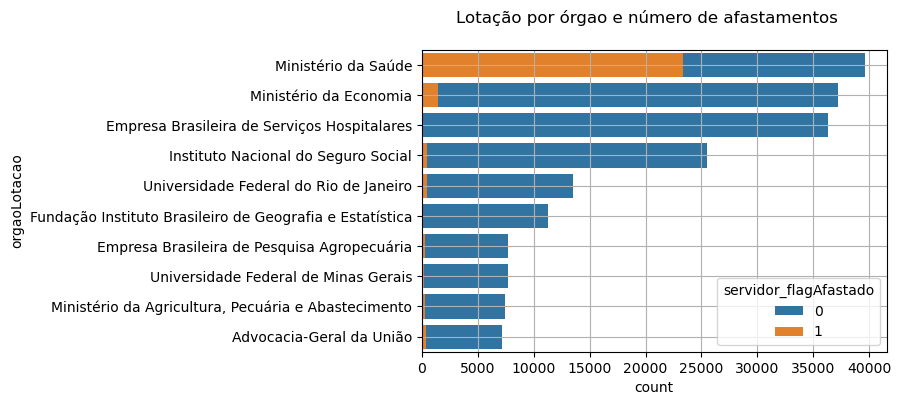

In [91]:
fig,ax = plt.subplots(dpi=100)
sns.countplot(data=df_civis,y='orgaoLotacao',order=df_civis['orgaoLotacao'].value_counts().index[:10],
            hue='servidor_flagAfastado',dodge=False)

plt.grid();
plt.suptitle("Lotação por órgao e número de afastamentos");
plt.savefig('./plots/lotação-orgão-afastamento-civis.png',bbox_inches='tight',facecolor='white')

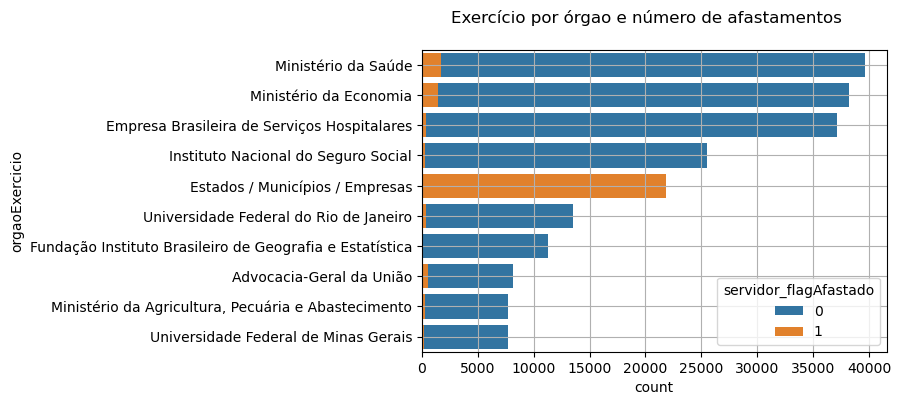

In [92]:
fig,ax = plt.subplots(dpi=100)
sns.countplot(data=df_civis,y='orgaoExercicio',order=df_civis['orgaoExercicio'].value_counts().index[:10],
            hue='servidor_flagAfastado',dodge=False)

plt.grid();
plt.suptitle("Exercício por órgao e número de afastamentos");
plt.savefig('./plots/exercicio-orgão-afastamento-civis.png',bbox_inches='tight',facecolor='white')

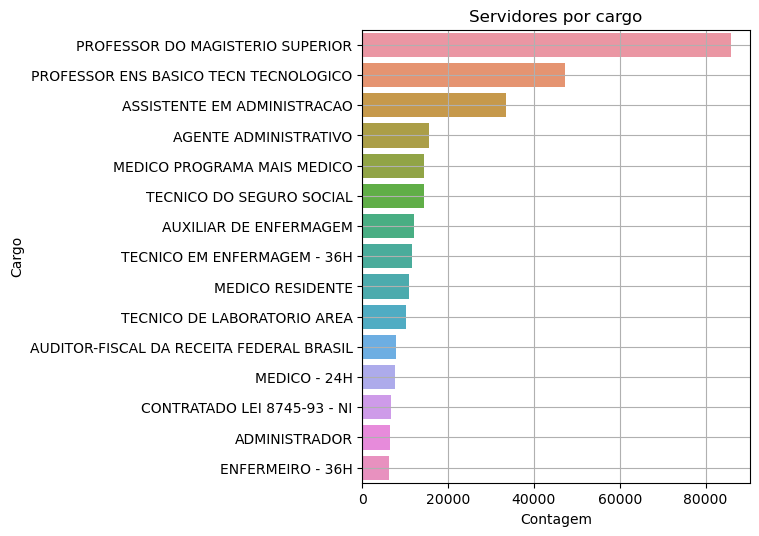

In [93]:
fig,axes = plt.subplots(dpi=100,figsize=(5,6))

sns.countplot(data=df_civis,y='cargo_cargo',order=df_civis['cargo_cargo'].value_counts().index[:15])
plt.title("Servidores por cargo")
plt.ylabel("Cargo")
plt.xlabel("Contagem")
plt.grid();

plt.savefig('./plots/servidores-civis-por-cargo.png',bbox_inches='tight',facecolor='white')

- Most of the civil servats are university professors, as shown in the countplot above

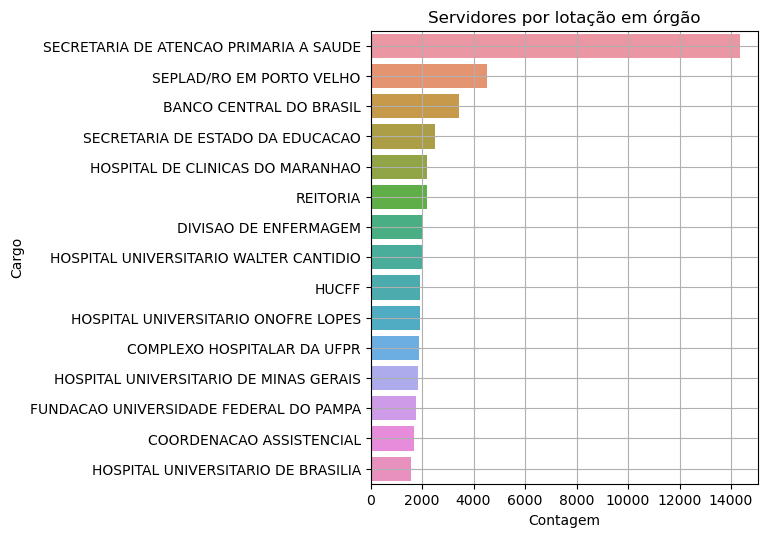

In [94]:
fig,axes = plt.subplots(dpi=100,figsize=(5,6))

sns.countplot(data=df_civis,y='cargo_uorgLotacao',order=df_civis['cargo_uorgLotacao'].value_counts().index[:15])
plt.title("Servidores por lotação em órgão")
plt.ylabel("Cargo")
plt.xlabel("Contagem")
plt.grid();

plt.savefig('./plots/servidores-por-lotação-orgão.png',bbox_inches='tight',facecolor='white')

In [58]:
df_civis[df_civis['cargo_uorgLotacao'] == 'SEPLAD/RO EM PORTO VELHO']['servidor_orgaoLotacao_codigo'].value_counts()

40803    4535
Name: servidor_orgaoLotacao_codigo, dtype: int64

- Finally, I will use the date in which the employees joined public service.

In [59]:
(df_civis['cargo_dataIngressoServicoPublico'] == 'Inválido').sum()+df_civis['cargo_dataIngressoServicoPublico'].isnull().sum()

67158

In [60]:
df_civis_dates = df_civis[['servidor_id','servidor_pessoa_id','cargo_dataIngressoServicoPublico']]

In [61]:
(df_civis_dates['cargo_dataIngressoServicoPublico'] == 'Inválido').sum()

32983

In [62]:
#Dropping invalid values
df_civis_dates = df_civis_dates[df_civis_dates['cargo_dataIngressoServicoPublico'] != 'Inválido'].dropna().copy()

In [63]:
df_civis_dates['dates'] = pd.to_datetime(df_civis_dates['cargo_dataIngressoServicoPublico'],dayfirst=True)
df_civis_dates['mes-ano'] = df_civis_dates['dates'].dt.to_period('M')
df_civis_dates['ano'] = df_civis_dates['dates'].dt.to_period('Y')
#df_civis_dates['mes'] = df_civis_dates['dates'].dt.strftime('%m').astype(int)
#df_civis_dates['ano_int'] = df_civis_dates['dates'].dt.strftime('%Y').astype(int)

In [64]:
df_civis_dates.head()

,servidor_id,servidor_pessoa_id,cargo_dataIngressoServicoPublico,dates,mes-ano,ano
0,139151002,8416947,05/12/2016,2016-12-05,2016-12,2016
1,140052807,7001066,22/03/2001,2001-03-22,2001-03,2001
3,140949850,4718322,17/06/2010,2010-06-17,2010-06,2010
4,141250377,7503815,17/12/2004,2004-12-17,2004-12,2004
5,141949452,8102675,02/07/1984,1984-07-02,1984-07,1984


In [65]:
df_year = df_civis_dates.groupby('ano').count()[['servidor_id']].reset_index()

In [66]:
presidentes = pd.read_csv("./presidentes.csv")
presidentes['ano'] = pd.to_datetime(presidentes['ano'],format="%Y").dt.to_period('Y')


In [67]:
year_counts = pd.merge(left=df_year,right=presidentes,on='ano')
year_counts['ano'] = year_counts['ano'].dt.strftime('%Y')

In [68]:
year_counts['moving_average'] = year_counts['servidor_id'].rolling(4).mean()

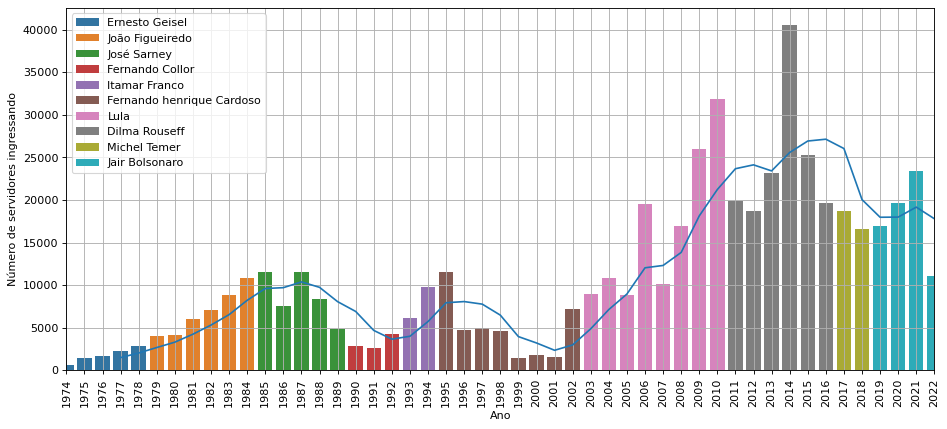

In [69]:
fig,ax = plt.subplots(dpi=80,figsize=(14,6))
sns.barplot(data=year_counts,x='ano',y='servidor_id',hue='Nome',dodge=False,ax=ax)
sns.lineplot(data=year_counts,x='ano',y='moving_average')
plt.xticks(rotation=90);
plt.ylabel("Número de servidores ingressando")
plt.xlabel("Ano")
sns.move_legend(ax,"upper left",bbox_to_anchor=(0,1))
plt.grid();
plt.xlim(('1974','2022'));



In [70]:
election_years = list(map(str,[1974,1978,1985,1989,1994,1998,2002,2006,2010,2014,2018,2022]))
df_civis_dates['election_year'] = df_civis_dates['ano'].dt.strftime('%Y').map(lambda x: x in election_years)
df_civis_dates.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 545247 entries, 0 to 8006
Data columns (total 7 columns):
 #   Column                            Non-Null Count   Dtype         
---  ------                            --------------   -----         
 0   servidor_id                       545247 non-null  object        
 1   servidor_pessoa_id                545247 non-null  object        
 2   cargo_dataIngressoServicoPublico  545247 non-null  object        
 3   dates                             545247 non-null  datetime64[ns]
 4   mes-ano                           545247 non-null  period[M]     
 5   ano                               545247 non-null  period[A-DEC] 
 6   election_year                     545247 non-null  bool          
dtypes: bool(1), datetime64[ns](1), object(3), period[A-DEC](1), period[M](1)
memory usage: 29.6+ MB


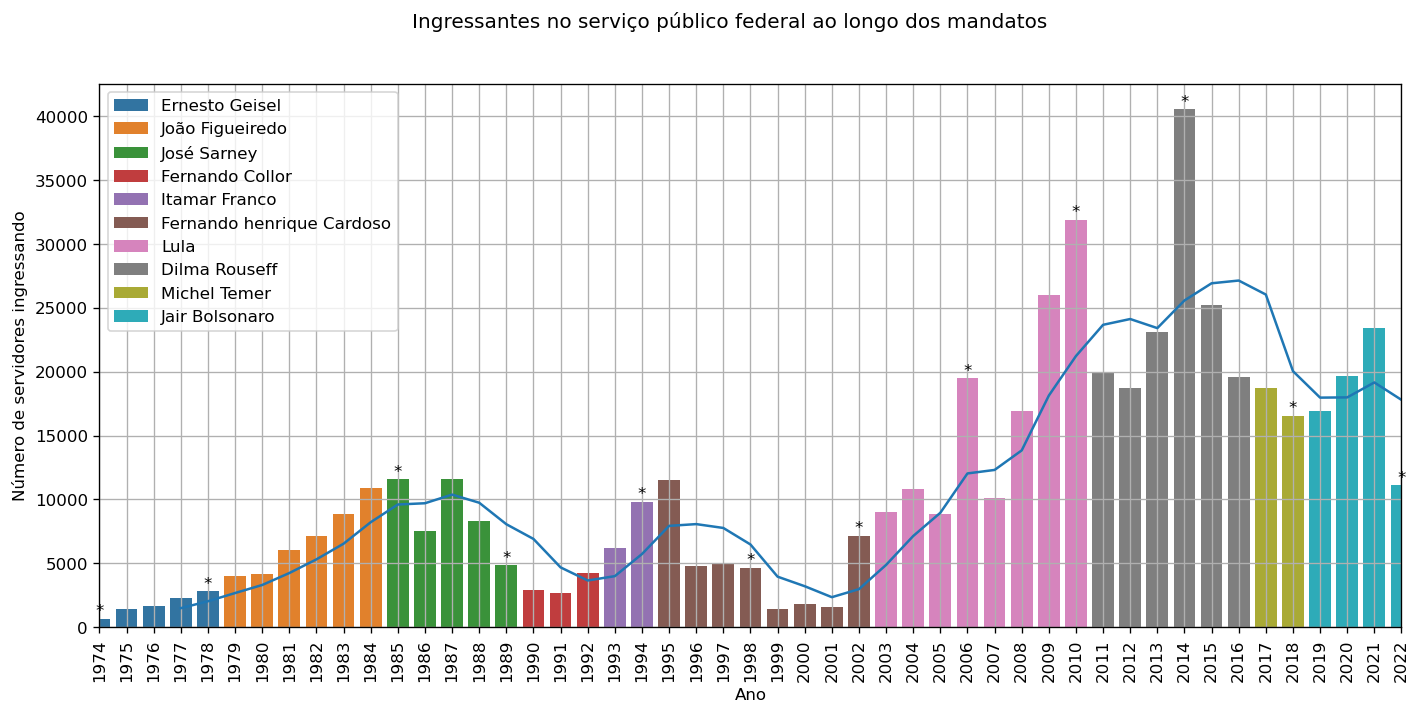

In [95]:
fig,ax = plt.subplots(dpi=120,figsize=(14,6))
sns.barplot(data=year_counts,x='ano',y='servidor_id',dodge=False,ax=ax,hue='Nome')
sns.lineplot(data=year_counts,x='ano',y='moving_average')
plt.xticks(rotation=90);
plt.ylabel("Número de servidores ingressando")
plt.xlabel("Ano")
sns.move_legend(ax,"upper left",bbox_to_anchor=(0,1))
plt.grid();
plt.xlim(('1974','2022'));

for containers in ax.containers:
    labels = []
    for i,bar in enumerate(containers):
        if not np.isnan(bar.get_height()) and year_counts['ano'][i] in election_years:
            labels.append("*")
        else:
            labels.append("")
        
    ax.bar_label(containers,labels=labels)

fig.suptitle("Ingressantes no serviço público federal ao longo dos mandatos");
plt.savefig('./plots/ingressantes-ano-mandato-eleição.png',bbox_inches='tight',facecolor='white')
    

    


In [72]:
year_month_counts = df_civis_dates.groupby(['mes-ano']).count().reset_index()[['mes-ano','servidor_pessoa_id']]
year_month_counts['mes'] = year_month_counts['mes-ano'].dt.strftime("%m")
year_month_counts['ano'] = year_month_counts['mes-ano'].dt.strftime("%Y")
year_month_counts.head()



,mes-ano,servidor_pessoa_id,mes,ano
0,1960-10,1,10,1960
1,1961-09,1,09,1961
2,1962-03,1,03,1962
3,1962-07,1,07,1962
4,1963-04,1,04,1963


In [73]:
election_months_mean = year_month_counts[year_month_counts['ano'].isin(election_years)].groupby('mes').mean().reset_index()
common_months_mean = year_month_counts[~year_month_counts['ano'].isin(election_years)].groupby('mes').mean().reset_index()
election_months_mean.head()

,mes,servidor_pessoa_id
0,01,1305.416667
1,02,1023.500000
2,03,1649.833333
3,04,1021.583333
4,05,886.454545


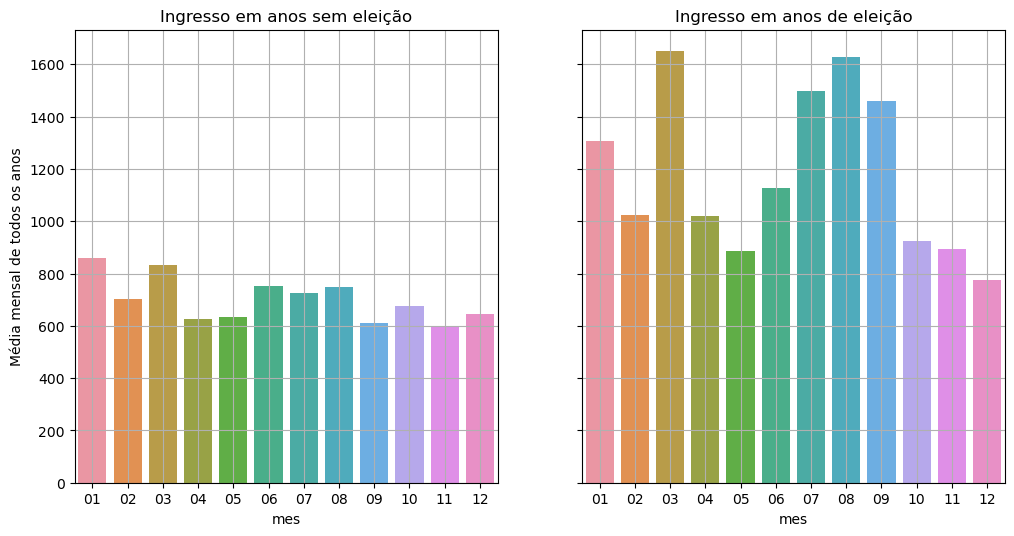

In [96]:
fig,axes = plt.subplots(ncols=2,dpi=100,sharey=True,figsize=(12,6))

sns.barplot(data=common_months_mean,x='mes',y='servidor_pessoa_id',ax=axes[0])
axes[0].set_title("Ingresso em anos sem eleição")
axes[0].set_ylabel("Média mensal de todos os anos")
axes[0].grid(True)

sns.barplot(data=election_months_mean,x='mes',y='servidor_pessoa_id',ax=axes[1])
axes[1].set_title("Ingresso em anos de eleição")
axes[1].set_ylabel("")
axes[1].grid(True)

plt.savefig('./plots/ingresso-mes-hue-eleição.png',bbox_inches='tight',facecolor='white')

In [75]:
df_civis_estado = df_civis[['servidor_pessoa_id','servidor_estadoExercicio']]
df_civis_estado = df_civis_estado.dropna()
df_civis_estado.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 411072 entries, 276 to 8006
Data columns (total 2 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   servidor_pessoa_id        411072 non-null  object
 1   servidor_estadoExercicio  411072 non-null  object
dtypes: object(2)
memory usage: 9.4+ MB


In [76]:
df_civis_estado['servidor_estadoExercicio'] = df_civis_estado['servidor_estadoExercicio'].str.title()
df_civis_estado['servidor_estadoExercicio'] = df_civis_estado['servidor_estadoExercicio'].str.replace(' Do ',' do ')
df_civis_estado['servidor_estadoExercicio'] = df_civis_estado['servidor_estadoExercicio'].str.replace(' De ',' de ')

In [77]:
state_counts = df_civis_estado.groupby(['servidor_estadoExercicio']).count().reset_index()
state_counts.columns = ['Estado','Servidores']

In [99]:
#Now adjusting by population
population = pd.read_csv("./population.csv")


In [100]:
population['População'] = population['População'].astype(str).str.replace(" ","").astype(int)

In [101]:
emp_per_population = pd.merge(left=state_counts,right=population,on='Estado')
emp_per_population['Servidores por 100k habitantes'] = 100000*emp_per_population['Servidores']/emp_per_population['População']


In [102]:
from shapely.geometry import Polygon
import json

In [103]:
with open("./brazil-states.geojson",encoding='utf-8') as file:
    brazil_geo = json.load(file,)

In [104]:
states_dict = {}
for feature in brazil_geo['features']:
    states_dict['{}'.format(feature['properties']['name'])] = Polygon(feature['geometry']['coordinates'][0][0])
    feature['id'] = feature['properties']['name']



In [107]:
import geopandas as gpd

In [108]:
states_geo = gpd.GeoDataFrame.from_dict(states_dict,orient='index').reset_index()
states_geo.columns = ['Estado','geometry']

In [109]:
emp_per_population = gpd.GeoDataFrame(emp_per_population.merge(right=states_geo),geometry='geometry')

In [ ]:
import geoplot as gplt

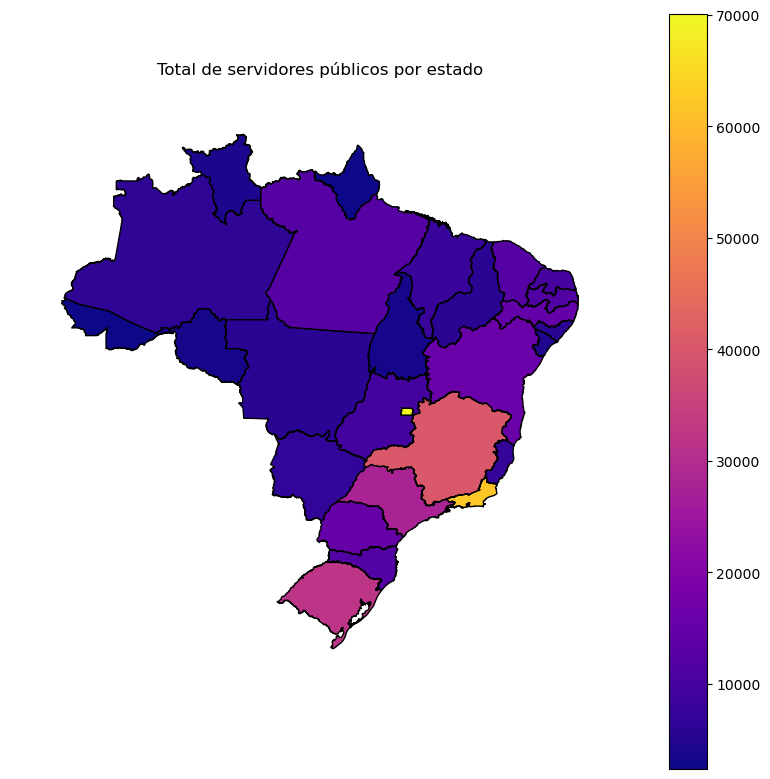

In [118]:
fig,ax = plt.subplots(dpi=100,figsize=(10,10))
gplt.choropleth(
    emp_per_population,
    hue='Servidores',
    legend=True,
    ax=ax,
    cmap='plasma'
);

ax.set_title("Total de servidores públicos por estado");
plt.savefig("./plots/total-servidores-estado.png",facecolor='white',bbox_inches='tight')

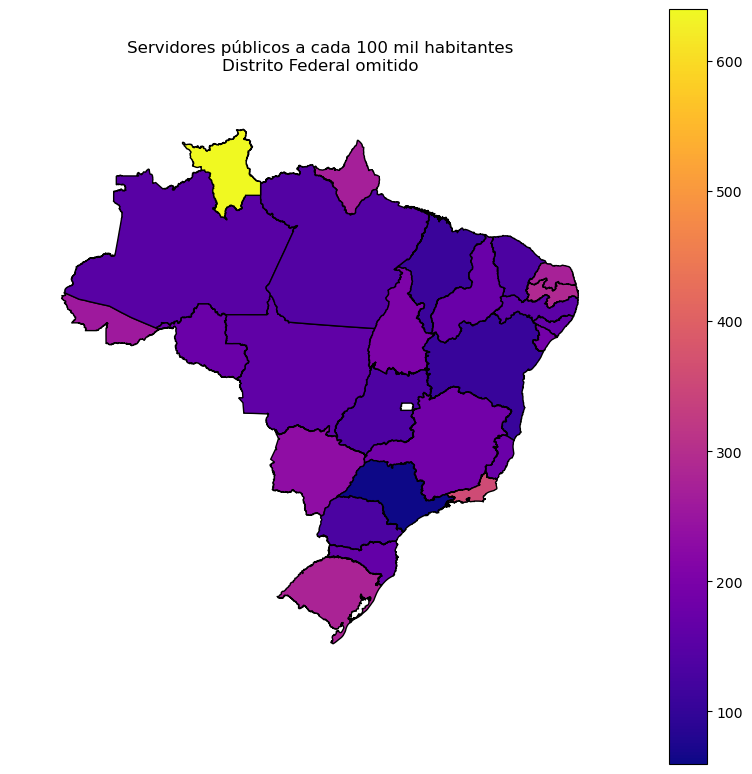

In [119]:
fig,ax = plt.subplots(dpi=100,figsize=(10,10))
gplt.choropleth(
    emp_per_population.drop(6),
    hue='Servidores por 100k habitantes',
    legend=True,
    ax=ax,
    cmap='plasma'
);

ax.set_title("Servidores públicos a cada 100 mil habitantes\nDistrito Federal omitido");
plt.savefig("./plots/servidores-100mil-estado.png",facecolor='white',bbox_inches='tight')
